# Predictive Modeling with Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
import scipy.stats as stats

In [2]:
data = pd.read_csv('c:Downloads/Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.shape

(2938, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Data Preprocessing

In [6]:
data = pd.get_dummies(data, columns=['Status', 'Country'])
data.sample(5)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
2265,2015,75.6,121.0,1,NaN,0.000000,94.0,383,6.0,1,...,False,False,False,False,False,False,False,False,False,False
1573,2012,55.3,42.0,31,0.01,82.768659,96.0,11,18.4,46,...,False,False,False,False,False,False,False,False,False,False
2725,2004,51.3,485.0,104,9.89,36.606093,62.0,141,14.2,164,...,False,False,False,False,False,False,False,False,False,False
1828,2000,62.5,238.0,46,0.08,17.912337,NaN,9397,11.4,62,...,False,False,False,False,False,False,False,False,False,False
990,2003,72.7,132.0,1,3.36,70.541853,48.0,216,47.5,2,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()
data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,False,False,False,False,False,False,False,False,False,False
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,False,False,False,False,False,False,False,False,False,False
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,False,False,False,False,False,False,False,False,False,False
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,False,False,False,False,False,False,False,False,False,False
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,False,False,False,False,False,False,False,False,False,True
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,False,False,False,False,False,False,False,False,False,True
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,False,False,False,False,False,False,False,False,False,True
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,False,False,False,False,False,False,False,False,False,True


In [8]:
numeric_data = data.select_dtypes(include=[np.number])
z = np.abs(stats.zscore(numeric_data))

print(z)

          Year  Life expectancy   Adult Mortality  infant deaths   Alcohol  \
0     1.621762          0.444448         0.791586       0.268824  1.172958   
1     1.404986          0.980950         0.856072       0.285786  1.172958   
2     1.188210          0.980950         0.831890       0.302749  1.172958   
3     0.971434          1.023029         0.864132       0.328193  1.172958   
4     0.754658          1.054587         0.888314       0.345155  1.172958   
...        ...               ...              ...            ...       ...   
2933  0.762774          2.622015         4.499494       0.028022  0.062024   
2934  0.979550          2.600976         4.435009       0.036503  0.138640   
2935  1.196326          2.569417         0.739941       0.044984  0.044146   
2936  1.413102          2.516818         4.201249       0.044984  0.736246   
2937  1.629878          2.443181         4.031975       0.053466  0.746462   

      percentage expenditure  Hepatitis B  Measles       BMI   

### Feature selection

In [9]:
correlation = data.corr()
target_variable = 'Life expectancy '
if target_variable in correlation.columns:
    positive_features = correlation[target_variable][correlation[target_variable] >= 0].index.tolist()
    if target_variable in positive_features:
        positive_features.remove(target_variable)
else:
    print(f"Target variable '{target_variable}' not found in the correlation matrix.")
    positive_features = []

if not positive_features:
    raise ValueError("No positive features found. Please check your data.")

X = data[positive_features]
y = data[target_variable]

In [10]:
# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Model building
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 13.45
Root Mean Squared Error: 3.67
R-squared: 0.84
Mean Absolute Error: 2.64


In [12]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_squared_error')
print(f"Mean Cross-Validation MSE: {-cv_scores.mean():.2f}")

Mean Cross-Validation MSE: 264657068246573424608018432.00


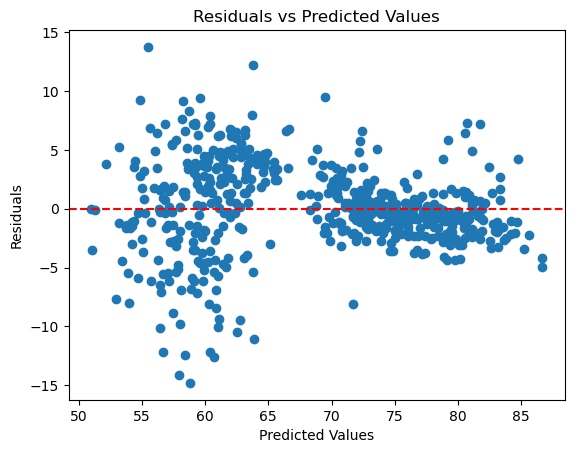

In [13]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

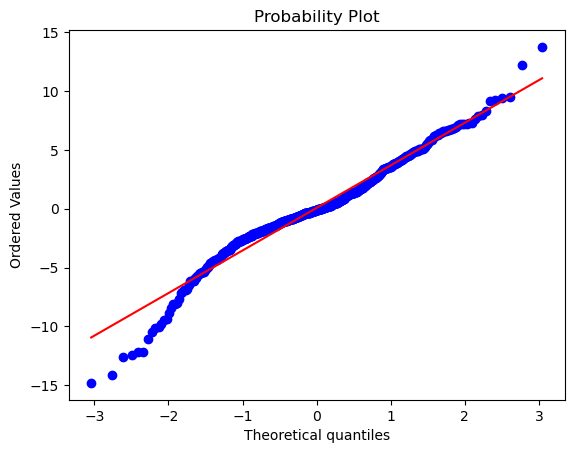

In [14]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

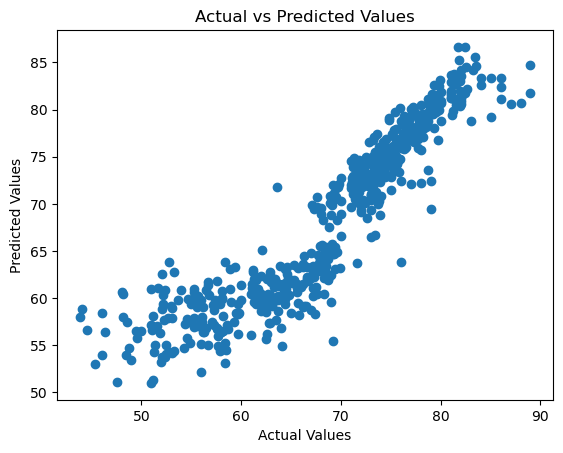

In [15]:
# Actual vs Predicted values plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()